In [5]:
get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')
get_ipython().magic('matplotlib inline')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import six, sys
sys.path.append('..'); import pathcustomize, about
about.about()


Python 2.7.9 (default, Apr 14 2015 12:54:25) [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)] on linux2, Host: cody


In [7]:
import sys
import os
import pathlib
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy

sys.path.append('..')
import pathcustomize
from waldo.conf import settings
#from waldo.wio.experiment import Experiment
#from waldo.behavior import Behavior_Coding, Worm_Shape
import fig_scripts as fs

# RESET THIS PATH TO BE ACCURATE! HAVE OWN DATA FOLDER ELSEWHERE!
# LOOK AT WHERE FILES WERE MOVED! wh


### Find which data exists

In [12]:
#settings.PROJECT_DATA_ROOT = '../../data/test'
settings.PROJECT_DATA_ROOT = '/home/projects/worm_movement/Data/WALDO_Data/'

# #'../../data/test/20130318_131056/blob_files/'
# pl = pathlib.Path(settings.PROJECT_DATA_ROOT)
# # path = pl / eid / 'blob_files'
# # print(path)
# print(pl.absolute())
# for i in pl.glob('*'):
    
#     summary_list = list(i.glob('blob_files/*.summary'))
#     if not len(summary_list):
#         continue
#     print(i.name, summary_list[0].name)
    
    
#'../../data/test/20130318_131056/blob_files/'
pl = pathlib.Path(settings.PROJECT_DATA_ROOT)
print(pl.absolute())
files = {}
for i in pl.glob('*'):
    
    summary_list = list(i.glob('blob_files/*.summary'))
    if not len(summary_list):
        continue
    #print(i.name, summary_list[0].name)
    files[i.name] = summary_list[0].name.split('.summary')[0]

names = sorted(list(files.keys()))
for n in names:
    print "'{n}',".format(n=n) , '#  --', files[n]

/home/projects/worm_movement/Data/WALDO_Data
'20130702_135652', #  -- worm tracking test
'20130702_135704', #  -- worm tracking test
'20150504_123807', #  -- copper-test2
'20150505_111654', #  -- copper-A3-10worms-N2-same-plate
'20150505_150046', #  -- copper-A3-10worms-N2-new-plate
'20150506_115813', #  -- copper-A4-10worms-N2
'20150506_153738', #  -- copper-A4-5worms-N2
'20150507_103013', #  -- copper-A5-10worms-N2
'20150507_144556', #  -- copper-A5-5worms-N2
'20150508_105539', #  -- copper-A6-10worms-N2
'20150511_121312', #  -- copper-10worms-N2-day1-standard
'20150511_121317', #  -- copper-10worms-N2-day1-standard
'20150511_121322', #  -- copper-10worms-N2-day1-standard
'20150511_160114', #  -- copper-30worms-N2-day1-populationtest
'20150511_160118', #  -- copper-20worms-N2-day1-populationtest
'20150511_160123', #  -- copper-10worms-N2-day1-populationtest
'20150512_110456', #  -- copper-10worms-N2-day2-standard
'20150512_110519', #  -- copper-10worms-N2-day2-standard
'20150512_1105

### Check if data grabbing works

In [127]:
eid = '20150615_170754'
eid = '20150608_121725'
path =  pl / eid / 'blob_files'
print(path)
test_list = fs.pull_blobs_from_eid(eid=eid, path=path, 
                                   min_time=10, min_timepoints=100, dt=1.0)

print('test list is ', len(test_list), 'tracks')
df = test_list[0]
df.head()

/home/projects/worm_movement/Data/WALDO_Data/20150608_121725/blob_files
20150608_121725
(66.893506525175994, 'bl')
(11, 'blobs match criterion')
(5, 'blobs fail criterion')
('test list is ', 11, 'tracks')


,time,frame,x,y,length,width,len_x,len_y,angle,std_width,...,speed_perp,speed_along,std_length,d_angle,angular_v,ar,std_ar,minutes,behavior_class,move_dir
0,1,16,176.538157,1525.490388,52.309504,11.566116,-6.558624,8.390310,2.235569,2.693921,...,0.452259,-7.251091,0.476493,0.013080,0.199306,0.221260,5.773646,0.016231,-1,-1
1,2,31,181.427182,1519.177483,48.786777,8.956198,-7.979988,8.649736,2.317731,2.552566,...,-0.783030,-9.033074,0.599332,-0.004391,-0.066497,0.184002,4.314250,0.034008,-1,-1
2,3,46,187.918021,1511.740595,57.461157,10.506198,-9.419636,10.677521,2.293341,2.599860,...,0.656611,-11.141349,0.738384,0.002613,0.039770,0.183072,3.525477,0.049589,-1,-1
3,4,61,195.546566,1504.275917,61.245041,8.616529,-10.082124,10.192769,2.350959,2.864207,...,-0.141223,-10.911548,0.722685,0.003147,0.047998,0.140716,3.965309,0.066262,-1,-1
4,5,76,203.364756,1495.165888,60.671901,9.472727,-9.194624,10.195190,2.304929,3.280190,...,-0.938880,-12.850340,0.859406,-0.008565,-0.128402,0.156141,3.824014,0.082938,-1,-1


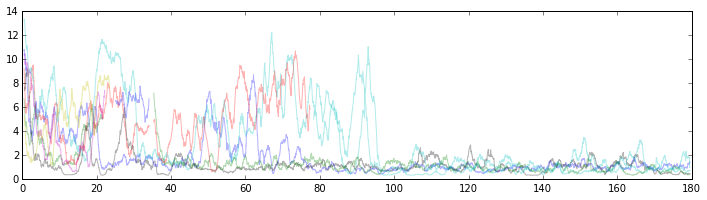

In [128]:
fig, ax = plt.subplots(figsize=(12,3))

for df in test_list:
    d = pd.rolling_mean(df[['minutes', 'speed']], 60, center=True)
    ax.plot(d['minutes'], d['speed'], alpha=0.3)
plt.show()

## Start importing temp data

In [21]:
h1 = [
    '20150518_182454',  # copper-10worms-N2-day1-standard_25degree
    '20150518_182501',  # copper-10worms-N2-day1-standard_25degree
    '20150518_182452',  # copper-10worms-N2-day1-standard_25degree
    ]
    
    
c1 = ['20150518_121756', # copper-10worms-N2-day1-standard_15degree
      '20150518_121757', # copper-10worms-N2-day1-standard_15degree
      '20150518_121809',  # copper-10worms-N2-day1-standard_15degree
    ]

h2 = [
'20150615_124720', # 	10 	copper-10worms-N2-day1-25degrees 	180
'20150615_124728', # 	10 	copper-10worms-N2-day1-25degrees 	180
'20150615_124738', # 	10 	copper-10worms-N2-day1-25degrees 	180
]
c2 = [
'20150615_170747', # 	10 	copper-10worms-N2-day1-15degrees 	180
'20150615_170754', # 	10 	copper-10worms-N2-day1-15degrees 	180
'20150615_170759', # 	10 	copper-10worms-N2-day1-15degrees 	180
]

h3 = [
'20150625_132445', #  -- copper-10worms-N2-day1-25 degree
'20150625_132448', #  -- copper-10worms-N2-day1-25degree  
'20150625_132449', #  -- copper-10worms-N2-day1-25degree    
    
]
c3 = [

'20150625_180232', #  -- copper-10worms-N2-day1-15degree
#'20150625_180236', #  -- copper-10worms-N2-day1-15degree
'20150625_180237', #  -- copper-10worms-N2-day1-15degree

]

h = h1 + h2 + h3
c = c1 + c2 + c3
print('hot')
print(h)
print('cold')
print(c)

hot
['20150518_182454', '20150518_182501', '20150518_182452', '20150615_124720', '20150615_124728', '20150615_124738', '20150625_132445', '20150625_132448', '20150625_132449']
cold
['20150518_121756', '20150518_121757', '20150518_121809', '20150615_170747', '20150615_170754', '20150615_170759', '20150625_180232', '20150625_180237']


In [18]:
def process_eid_list(eids, pl, total_seconds, min_time=20, min_timepoints=1000, dt=1.0):
    paths = [pl / eid / 'blob_files' for eid in eids]
    blobs = []
    plate_dfs = []
    total_seconds = 10801
    for eid, path in zip(eids, paths):
        if not path.exists():
            print('pass')
            continue
        print(eid, path)
        some_blobs = fs.pull_blobs_from_eid(eid=eid, path=path, min_time=20, min_timepoints=1000, dt=1.0)
        blobs.append(some_blobs)
        d = fs.aggregate_track_dfs(some_blobs, total_seconds=total_seconds)
        plate_dfs.append(d)
        
    allblobs = []
    agg_df = []
    for bs in blobs:
        allblobs = allblobs + bs
        agg_df = fs.aggregate_track_dfs(allblobs, total_seconds=total_seconds)
    return paths, blobs, plate_dfs, agg_df

total_seconds = 10801
h_paths, h_blobs, h_plate_dfs, h_df = process_eid_list(h, pl=pl, total_seconds=total_seconds)

('20150518_182454', PosixPath('/home/projects/worm_movement/Data/WALDO_Data/20150518_182454/blob_files'))
20150518_182454
(76.293434508367739, 'bl')
(11, 'blobs match criterion')
(2, 'blobs fail criterion')
('20150518_182501', PosixPath('/home/projects/worm_movement/Data/WALDO_Data/20150518_182501/blob_files'))
20150518_182501
(80.97836458493245, 'bl')
(15, 'blobs match criterion')
(2, 'blobs fail criterion')
('20150518_182452', PosixPath('/home/projects/worm_movement/Data/WALDO_Data/20150518_182452/blob_files'))
20150518_182452
(73.598493169573615, 'bl')
(13, 'blobs match criterion')
(0, 'blobs fail criterion')
('20150615_124720', PosixPath('/home/projects/worm_movement/Data/WALDO_Data/20150615_124720/blob_files'))
20150615_124720
(69.472491605192289, 'bl')
(12, 'blobs match criterion')
(0, 'blobs fail criterion')
('20150615_124728', PosixPath('/home/projects/worm_movement/Data/WALDO_Data/20150615_124728/blob_files'))
20150615_124728
(68.496715275266311, 'bl')
(8, 'blobs match criteri

In [22]:
c_paths, c_blobs, c_plate_dfs, c_df = process_eid_list(c, pl=pl, total_seconds=total_seconds)

('20150518_121756', PosixPath('/home/projects/worm_movement/Data/WALDO_Data/20150518_121756/blob_files'))
20150518_121756
(71.916798525839624, 'bl')
(20, 'blobs match criterion')
(0, 'blobs fail criterion')
('20150518_121757', PosixPath('/home/projects/worm_movement/Data/WALDO_Data/20150518_121757/blob_files'))
20150518_121757
(70.928344472232325, 'bl')
(15, 'blobs match criterion')
(0, 'blobs fail criterion')
('20150518_121809', PosixPath('/home/projects/worm_movement/Data/WALDO_Data/20150518_121809/blob_files'))
20150518_121809
(68.95222761103993, 'bl')
(15, 'blobs match criterion')
(2, 'blobs fail criterion')
('20150615_170747', PosixPath('/home/projects/worm_movement/Data/WALDO_Data/20150615_170747/blob_files'))
20150615_170747
(68.144086054745969, 'bl')
(16, 'blobs match criterion')
(1, 'blobs fail criterion')
('20150615_170754', PosixPath('/home/projects/worm_movement/Data/WALDO_Data/20150615_170754/blob_files'))
20150615_170754
(68.474356450243732, 'bl')
(13, 'blobs match criter

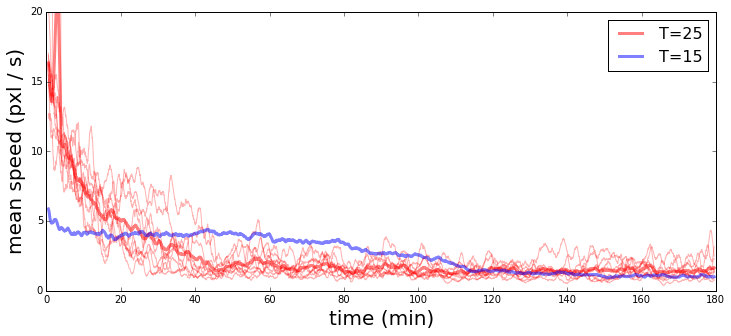

In [27]:
fig, ax = plt.subplots(figsize=(12,5))
stat = 'mean'
for df in h_plate_dfs:
    #print(df.head(70))
    ax.plot(df['time']/ 60, df[stat], color='red', alpha=0.3)
    
ax.plot(h_df['time']/ 60, h_df[stat], color='red', alpha=0.5, label='T=25', lw=3)
ax.plot(c_df['time']/ 60, c_df[stat], color='blue', alpha=0.5, label='T=15', lw=3)

ax.legend(loc='best', fontsize=16)
ax.set_ylim([0, 20])
ax.set_ylabel('mean speed (pxl / s)', size=20)
ax.set_xlabel('time (min)', size=20)
plt.savefig('temp-combined-t25.eps')
plt.show()
#ax.set_ylim([0, 2])

/home/visitors/peterwinter/.pyenv/versions/anaconda-2.1.0/lib/python2.7/site-packages/matplotlib/font_manager.py:1279: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Helvetica
  (prop.get_family(), self.defaultFamily[fontext]))
/home/visitors/peterwinter/.pyenv/versions/anaconda-2.1.0/lib/python2.7/site-packages/matplotlib/font_manager.py:1289: UserWarning: findfont: Could not match :family=Helvetica:style=normal:variant=normal:weight=normal:stretch=normal:size=medium. Returning /home/visitors/peterwinter/.pyenv/versions/general/local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/afm/phvl8a.afm
  UserWarning)
/home/visitors/peterwinter/.pyenv/versions/anaconda-2.1.0/lib/python2.7/site-packages/matplotlib/font_manager.py:1289: UserWarning: findfont: Could not match :family=Helvetica:style=normal:variant=normal:weight=normal:stretch=normal:size=20.0. Returning /home/visitors/peterwinter/.pyenv/versions/general/local/lib/python2.7/site-packages/matpl

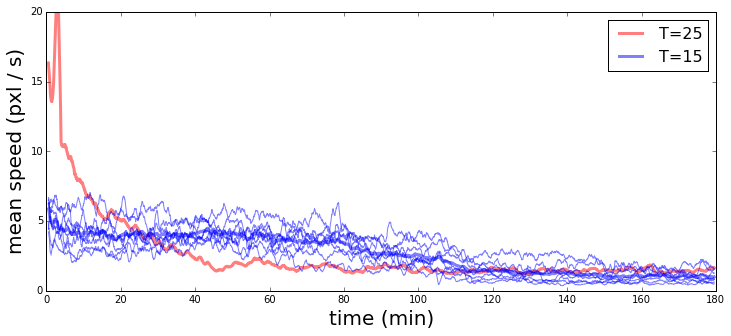

In [26]:
fig, ax = plt.subplots(figsize=(12,5))
stat = 'q2'
stat = 'mean'

    

ax.plot(h_df['time']/ 60, h_df[stat], color='red', alpha=0.5, label='T=25', lw=3)

# for df in t20_dfs:
#     ax.plot(df['time']/ 60, df[stat], color='black', alpha=0.5, label='T=20')
for df in c_plate_dfs:
    ax.plot(df['time']/ 60, df[stat], color='blue', alpha=0.5)
    
ax.plot(c_df['time']/ 60, c_df[stat], color='blue', alpha=0.5, label='T=15', lw=3)

ax.legend(loc='best', fontsize=16)
ax.set_ylim([0, 20])

ax.set_ylabel('mean speed (pxl / s)', size=20)
ax.set_xlabel('time (min)', size=20)
#plt.savefig('temp-speed-means2.png')
plt.savefig('temp-combined-t15.eps')
plt.show()
#ax.set_ylim([0, 2])

## Paper observation windows

In [ ]:
windows = pd.read_csv('/home/visitors/peterwinter/Dropbox/research/literature_dat.csv')
# windows =[
# {'authors':'Stephens et al. (2008)', 'acc':1, 'obs':60},
# {'authors':'Yu et al. (2013)', 'acc':0, 'obs':4},
# {'authors':'Silva et al. (2011)', 'acc':0, 'obs':1},
# {'authors':'Yemini et al. (2013)', 'acc':30, 'obs':15},
# ]
# w = pd.DataFrame(windows)
w = windows
w

In [119]:
#w = w.sort('delay (min)')
w = w.sort('duration (min)', ascending=False)
w

,Unnamed: 0,delay (min),duration (min),key
11,Long-term imaging of circadian locomotor rhyth...,0,5760,Winbush et al. (2015)
5,Dietary choice behavior in Caenorhabditis eleg...,120,480,Shtonda and Avery (2006)
17,The Geometry of Locomotive Behavioral States,0,240,Gallagher et al. (2013)
9,High-throughput behavioral analysis in C. elegans,240,60,Swierczek et al. (2011)
4,Controlling interneuron activity in Caenorhabd...,1,60,Kocabas et al. 2012
6,Dimensionality and Dynamics in the Behavior of...,1,60,Stephens et al. (2008)
12,Mechanistic analysis of the search behaviour o...,1,60,CLOCK: [2015-06-30 Tue 09:51]\nSalvador et al....
10,Locomotion analysis identifies roles of mechan...,0,20,Cohen et al. 2012
13,Monoaminergic orchestration of motor programs ...,0,20,Donnelly et al. (2013)
0,A dictionary of behavioral motifs reveals clus...,30,15,André et al. (2012)


In [120]:
import matplotlib.patches as patches
from matplotlib.lines import Line2D

(0, 0, 5760)
(1, 120, 480)
(2, 0, 240)
(3, 240, 60)
(4, 1, 60)
(5, 1, 60)
(6, 1, 60)
(7, 0, 20)
(8, 0, 20)
(9, 30, 15)
(10, 0, 15)
(11, 0, 15)
(12, 0, 10)
(13, 5, 5)
(14, 0, 4)
(15, 0, 1)
(16, 30, 1)
(17, 2, 1)
(18, 0, 1)


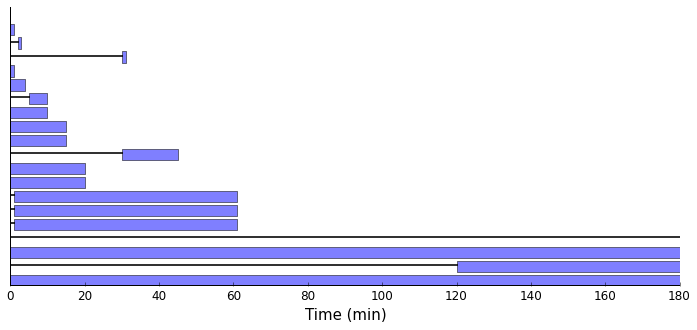

In [121]:

# axis params
tick_label_size = 12


# get data ready
# xs = list(w['delay (min)'])
# x0 = [0 for _ in xs]
# widths = list(w['duration (min)'])
# height = 1
# steps = []


# Make figure

fig, ax = plt.subplots(figsize=(12,5))
ax = plt.axes(frameon=False)
ax.get_xaxis().tick_bottom() # Turn off ticks at top of plot
ax.axes.get_yaxis().set_visible(False)


color = ax._get_lines.color_cycle.next()

for y, (i, row) in enumerate(w.iterrows()):
    x = row['delay (min)']
    width = row['duration (min)']
    print(y, x, width)
    step = patches.Rectangle((x, y), height=height*0.8, width=width,
                             fill=True, ec='k', #fc=color, ec=color,
                             alpha=0.5)
    ax.add_patch(step)
    if x !=0:
        ax.plot([0, x], [y+0.5, y+0.5], 'k', alpha=0.8, lw=2)
    
#     ax.text(120, y+0.5, row['key'],
#             verticalalignment='bottom', horizontalalignment='left',
#             #transform=ax.transAxes,
#             color='k', fontsize=14)
ax.plot([0, 0], [0, y+1], 'k')
        

ax.set_xlim([0, 180])

xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ax.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2))
ax.add_artist(Line2D((xmin, xmin), (ymin, ymax), color='black', linewidth=2))
ax.set_xlabel('Time (min)', size=15)
#plt.yticks(fontsize=tick_label_size)
plt.xticks(fontsize=tick_label_size)
plt.savefig('literature-coverage-chart.png')
plt.show()

In [122]:
480 / 60

8